C:\Users\82705\AppData\Local\Temp\ipykernel_74612\1602740587.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  attn = torch.load(path)


Loaded attention matrix of shape: torch.Size([3311, 17888])


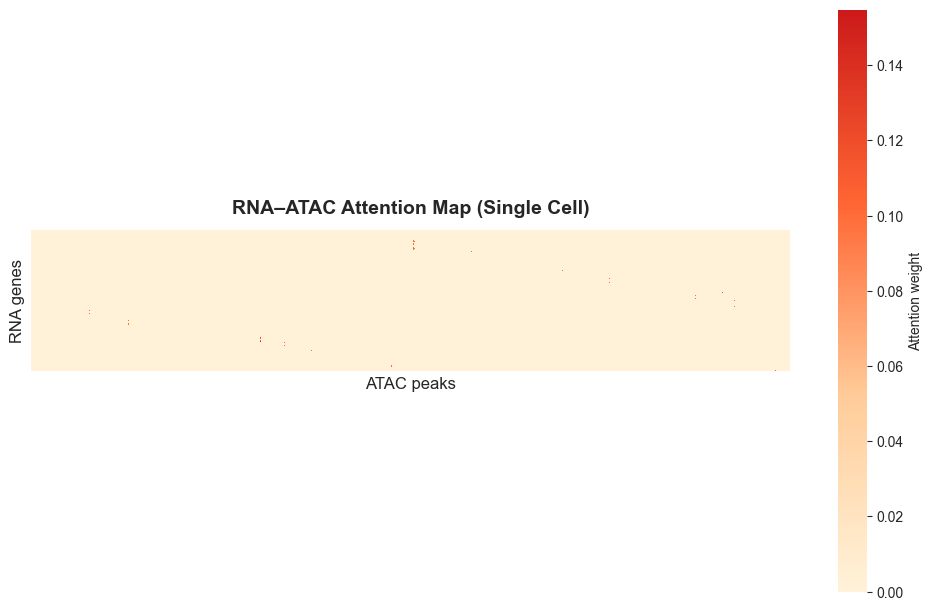

In [5]:
# -----------------------------
# Draw attention matrix for a single cell
# -----------------------------
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# ============ CONFIG ============
attention_save_dir = "./ISSAAC_test_attention/rna_atac_attention"
sample_id = 6 # Select the cell ID
# =================================

def load_attention_matrix(sample_id):
    """Load the RNA→ATAC attention matrix of one cell."""
    path = os.path.join(attention_save_dir, f"sample_{sample_id}.pt")
    if not os.path.exists(path):
        raise FileNotFoundError(f"Attention file not found: {path}")
    attn = torch.load(path)
    if not isinstance(attn, torch.Tensor):
        attn = torch.tensor(attn)
    return attn.squeeze(0).detach().cpu()

# -----------------------------
# Load data for the given cell
# -----------------------------
attention_matrix = load_attention_matrix(sample_id)
print(f"Loaded attention matrix of shape: {attention_matrix.shape}")   # (RNA_nonzero × ATAC_nonzero)

# -----------------------------
# Painting
# -----------------------------
colors = [
                (1.0, 0.95, 0.85),  # very light orange background
                (1.0, 0.8, 0.6),  # light orange
                (1.0, 0.4, 0.2),  # medium orange
                (0.8, 0.1, 0.1),  # strong red (activation)
            ]
custom_cmap = LinearSegmentedColormap.from_list("soft_orange_red", colors, N=256)
sns.set_style("white")
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
                attention_matrix,
                cmap=custom_cmap,
                square=True,
                cbar_kws={"shrink": 0.6, "label": "Attention weight"},
                xticklabels=False,
                yticklabels=False,
                linewidths=0,
            )
plt.title("RNA–ATAC Attention Map (Single Cell)", fontsize=14, weight='bold', pad=12)
plt.xlabel("ATAC peaks", fontsize=12)
plt.ylabel("RNA genes", fontsize=12)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_visible(False) 
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.tight_layout()
# plt.savefig("attention_heatmap.png", dpi=600, bbox_inches="tight")
plt.show()